In [560]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from numpy import log, polyfit, sqrt, std, subtract
from numpy.random import randn
import seaborn as sns
import matplotlib as mpl


import pandas_datareader.data as web  #Pandas Datareader
import matplotlib.pyplot as plt  
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'arial'
import mplfinance as mpf
from matplotlib.widgets import RangeSlider
import matplotlib.dates as dates
from mpl_toolkits.mplot3d import Axes3D
import pandas_datareader.data as web



import nolds
import pandas as pd
import numpy as np
import math
from fbm import *
from fbm import FBM
from tqdm import tqdm
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from datetime import datetime

import statsmodels.api as sm

from scipy.optimize import fsolve
from scipy import stats

import random

In [561]:
#ASSET
series_id  = 'DCOILBRENTEU'
#DATES
start_date = datetime(1994, 8, 31)
end_date = datetime(2024, 7, 1)

data =  web.DataReader(series_id, 'fred', start_date, end_date)

data


,DCOILBRENTEU
DATE,
1994-08-31,16.03
1994-09-01,16.03
1994-09-02,15.88
1994-09-05,15.60
1994-09-06,15.95
...,...
2024-06-25,86.81
2024-06-26,85.76
2024-06-27,87.00


In [562]:
# General Info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7784 entries, 1994-08-31 to 2024-07-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DCOILBRENTEU  7561 non-null   float64
dtypes: float64(1)
memory usage: 121.6 KB


In [563]:
data.describe(  )

,DCOILBRENTEU
count,7561.000000
mean,57.616727
std,32.330353
min,9.100000
25%,26.910000
50%,56.140000
75%,79.980000
max,143.950000


In [564]:
data = data.dropna()
# Calculate statistics
mean_value = data[series_id].mean()
std_value = data[series_id].std()
kurtosis_value = stats.kurtosis(data[series_id])

# Store in a DataFrame
basic_statistics = pd.DataFrame({
    "Statistic": ["Mean", "Standard Deviation", "Kurtosis"],
    "Value": [mean_value, std_value, kurtosis_value]
})

# Set 'Statistic' column as the index
basic_statistics.set_index("Statistic", inplace=True)

basic_statistics

,Value
Statistic,
Mean,57.616727
Standard Deviation,32.330353
Kurtosis,-0.971508


### Dailly Return

In [565]:
# use pct_change to find the percent change for each day
data['Daily Return'] = data['DCOILBRENTEU'].pct_change()

### Xt variable

In [566]:
Xt= lambda P: np.log(P) - np.log(P[0])

data['Xt']= Xt(data[series_id])

In [567]:
data = data[['DCOILBRENTEU','Daily Return','Xt']]
data

,DCOILBRENTEU,Daily Return,Xt
DATE,,,
1994-08-31,16.03,NaN,0.000000
1994-09-01,16.03,0.000000,0.000000
1994-09-02,15.88,-0.009357,-0.009402
1994-09-05,15.60,-0.017632,-0.027191
1994-09-06,15.95,0.022436,-0.005003
...,...,...,...
2024-06-25,86.81,0.000692,1.689260
2024-06-26,85.76,-0.012095,1.677091
2024-06-27,87.00,0.014459,1.691446



### Statistical Tests for Normality
Here we consider if the daily price-changes for Brent crude is  Normally distributed.

To do this we use two statistical tests - Here we show the resulting p-values.



In [568]:
# Perform Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = stats.kstest(data['Daily Return'][1:-1], 'norm')

# Perform Shapiro-Wilk test
shapiro_statistic, shapiro_pvalue = stats.shapiro(data['Daily Return'][1:-1])

# Create a DataFrame to store the test results
test_results = pd.DataFrame({
    'Statistic': [ks_statistic, shapiro_statistic],
    'P-value': [ks_pvalue, shapiro_pvalue]
}, index=['Kolmogorov-Smirnov', 'Shapiro-Wilk'])

# Display the test results
print("Statistical Tests for Normality:")
test_results

Statistical Tests for Normality:


,Statistic,P-value
Kolmogorov-Smirnov,0.466120,0.0
Shapiro-Wilk,0.855814,0.0


As we can see, the odds of these markets returns being Normally distributed are practically zero


In [569]:


# Create subplot figure
fig = make_subplots(rows=3, cols=1, shared_xaxes=False, vertical_spacing=0.1,
                    subplot_titles=("Brent Oil Price", "Daily Price Return", "Growth over Time (Xt)"))

# Add Brent Oil Price as a filled area plot
fig.add_trace(
    go.Scatter(x=data.index, y=data['DCOILBRENTEU'], fill='tozeroy', 
               line=dict(color='black'), name='Brent Oil Price'),
    row=1, col=1
)

# Add Daily Return as a line plot with markers
fig.add_trace(
    go.Scatter(x=data.index, y=data['Daily Return'], mode='lines+markers',
               line=dict(color='steelblue', dash='dash'), marker=dict(size=4),
               name='Daily Return'),
    row=2, col=1
)

# Add Xt as a filled area plot
fig.add_trace(
    go.Scatter(x=np.arange(len(data)), y=data['Xt'], fill='tozeroy',
               fillcolor='rgba(128, 128, 128, 0.4)', 
               line=dict(color='black', width=2),
               name='Growth over Time (Xt)'),
    row=3, col=1
)

# Update layout
fig.update_layout(
    height=700,
    width=900, 
    title_text="Comprehensive Analysis of Brent Crude Oil",
    template='plotly_white'
)

# Update axes
fig.update_xaxes(title_text="Date", row=3, col=1)
fig.update_yaxes(title_text="Price (USD/Bar)", row=1, col=1)
fig.update_yaxes(title_text="Returns (%)", row=2, col=1)
fig.update_yaxes(title_text="Xt", row=3, col=1)

# Show plot
fig.show()

### Delta t (No. of time Increment)
The number of observations captured is a hihly composite number (7560) with many actors
'delta_t' = time increment

A good way to take of this to to make the number of time increments (delta_t's) the same as the number of factors 7560

In [570]:
def factors(n):
    result = []
    for i in range(1, n + 1):
        if n % i == 0:
            result.append(i)
    return result

# Get all factors of 7560
delta_t = factors(7560)

# Print the result
print(delta_t)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 18, 20, 21, 24, 27, 28, 30, 35, 36, 40, 42, 45, 54, 56, 60, 63, 70, 72, 84, 90, 105, 108, 120, 126, 135, 140, 168, 180, 189, 210, 216, 252, 270, 280, 315, 360, 378, 420, 504, 540, 630, 756, 840, 945, 1080, 1260, 1512, 1890, 2520, 3780, 7560]


In [571]:
print("The number of delta_t's is: " + str(len(delta_t)))

The number of delta_t's is: 64


### Moments (q)
 q - is the statistical moments used to calculate the partition function.

Mathematically for statistical moments (q), q=1 is the mean, q=2 is the variance, q=4 is the kurtosis etc. 

This details is not needed here through.

Mandelbrot et al (1997) chose approximately 99 values for q, mostly concentrated around the low values between 0 and 5.
We shall try to do something similar.



[0.01       0.03512605 0.0602521  0.08537815 0.1105042  0.13563025
 0.1607563  0.18588235 0.2110084  0.23613445 0.2612605  0.28638655]


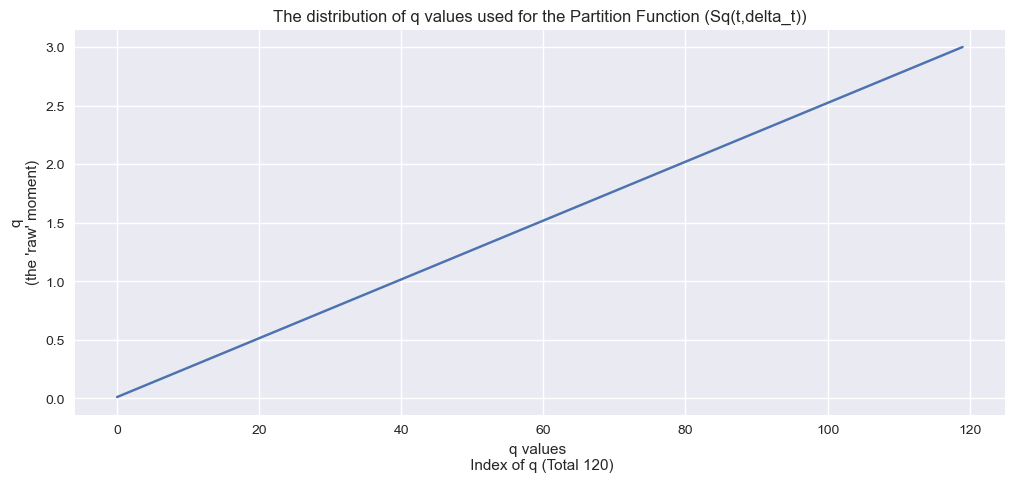

In [572]:
plt.figure(figsize=(12,5))
# Generate linearly spaced values between 0 and 5
#q_linear = np.linspace(0, 5, 100)
# Generate logarithmically spaced values between 5 and 100 for a broader range
#q_log = np.logspace(np.log10(5), np.log10(100), 21)

# Combine the two sets of values
#q = np.concatenate((q_linear, q_log))
q = np.linspace(0.01, 3, 120)
# Optionally sort the combined array (not strictly necessary as the concatenation maintains order)
q = np.sort(q)

plt.plot(q, marker ='x')

plt.title("The distribution of q values used for the Partition Function (Sq(t,delta_t))")
plt.xlabel("q values \n Index of q (Total " + str(len(q)) + ")")
plt.ylabel("q\n(the 'raw' moment)")

print(q[:12])


##### concentration of q Values 

In [573]:
print("The number of q's between 1 and 3 is: " + str(sum(float(num) <= 3 and float(num) >=1 for num in q)) +"\n")

print("The number of q's less than 1 is: " + str(sum(float(num) <= 1 for num in q)))
print("The number of q's greater than 3 is: " + str(sum(float(num) >= 3 for num in q)) +"\n")

print("Total q's: " + str(len(q)))

The number of q's between 1 and 3 is: 80

The number of q's less than 1 is: 40
The number of q's greater than 3 is: 1

Total q's: 120


### Hurst Exponent
#### R/S analysis
Rescaled Range (R/S) Analysis is a more traditional (crude) and widely used method for calculating the Hurst exponent.

It calculates price differences for various lags.
For each lag, it computes the range (R) of the cumulative deviations from the mean and the standard deviation (S) of the price differences.
It then calculates the R/S ratio for each lag.

The Hurst exponent (H) indicates price movement behavior: 
- H=0.5 suggests random walks, 
- H>0.5 implies trend persistence, 
- and H<0.5 indicates rapid reversals.

While H values can create apparent trends in price paths, these patterns are still fundamentally random and subject to long-term reversals.

The Hurst exponent for Brent Crude Oil is: 0.3692


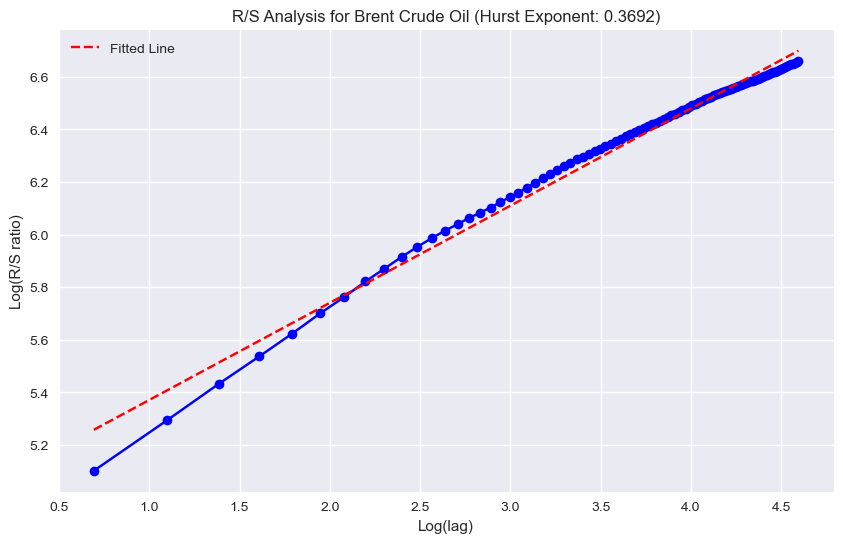

In [574]:
from numpy import log, polyfit, sqrt, std, subtract
from numpy.random import randn

def hurst_rs(time_series, max_lag=100):
    """
    Calculate Hurst exponent using R/S Analysis
    """
    lags = range(2, max_lag)
    tau = []
    
    for lag in lags:
        price_diff = subtract(time_series[lag:], time_series[:-lag])
        mean = np.mean(price_diff)
        cumulative = np.cumsum(price_diff - mean)
        r = np.max(cumulative) - np.min(cumulative)
        s = np.std(price_diff)
        if s != 0:
            tau.append(r / s)
        else:
            tau.append(0)
    
    poly = np.polyfit(log(lags), log(tau), 1)
    return poly[0], lags, tau



# Use closing prices for the analysis
prices =  data['DCOILBRENTEU'].values

# Calculate the Hurst exponent and get lags and tau values
h, lags, tau = hurst_rs(prices)

print(f"The Hurst exponent for Brent Crude Oil is: {h:.4f}")

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(log(lags), log(tau), 'bo-')
plt.xlabel('Log(lag)')
plt.ylabel('Log(R/S ratio)')
plt.title(f'R/S Analysis for Brent Crude Oil (Hurst Exponent: {h:.4f})')

# Add the fitted line
fit = np.polyfit(log(lags), log(tau), 1)
fit_fn = np.poly1d(fit)
plt.plot(log(lags), fit_fn(log(lags)), 'r--', label='Fitted Line')

plt.legend()
plt.grid(True)
plt.show()

###  Pricing Options with Fractional Brownian Motion (FBM) and  Monte Carlo

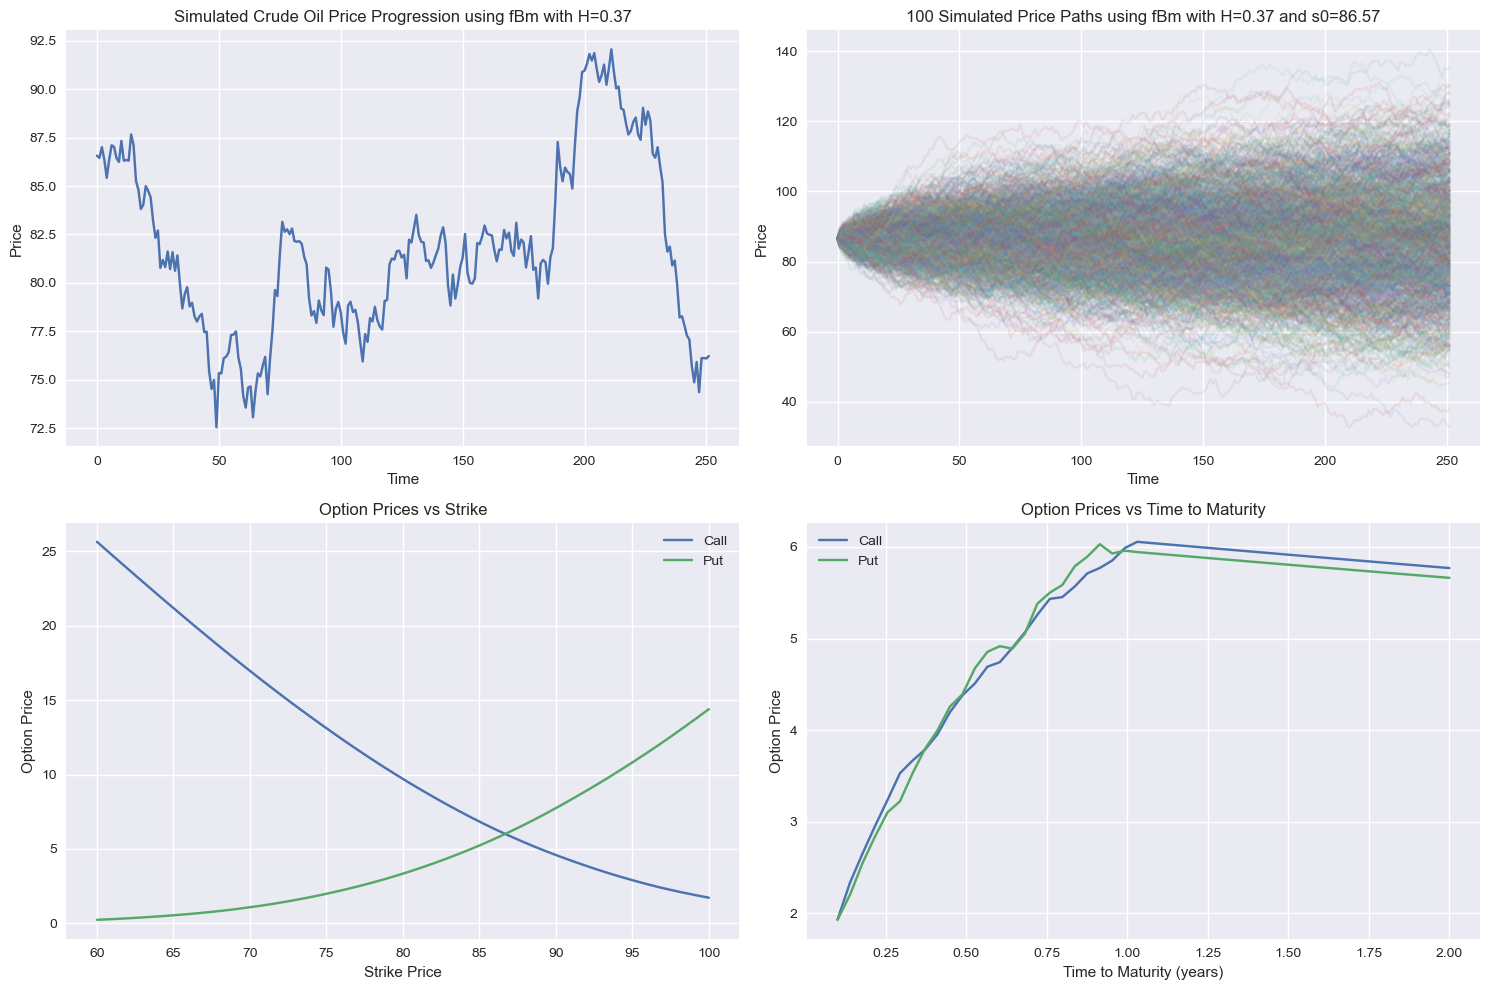

European Call Option Price (Strike 86.57): $6.06
European Put Option Price (Strike 86.57): $5.95
BSM Call Option Price (Strike 86.57): $15.8490
BSM Put Option Price (Strike 86.57): $11.6270
Implied Volatility: 40.75%


In [719]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def generate_fbm_path(n, hurst, dt=1, s0=1):
    """Generate a fractional Brownian motion path with n steps and a given Hurst exponent."""
    dW = np.random.randn(n)
    increments = dW * (dt**(hurst))
    fbm_path = np.cumsum(increments)
    fbm_path = fbm_path - fbm_path[0] + s0
    return np.maximum(fbm_path, 0)  # Ensure non-negative prices

def generate_multiple_paths(num_paths, n, hurst, dt=1, s0=1):
    """Generate multiple fBm paths"""
    return np.array([generate_fbm_path(n, hurst, dt, s0) for _ in range(num_paths)])

def option_pricer(paths, strike, r, T, option_type='call'):
    """
    Calculate the option price (european) given simulated paths.
    Parameters:
    - paths: An array of simulated asset paths. 
    - strike: Strike price of the option.
    - r: Risk-free rate.
    - T: Time to maturity in years.
    - option_type: call or put.
    """
    S_T = paths[:, -1]
    if option_type == 'call':
        payoffs = np.maximum(S_T - strike, 0)
    elif option_type == 'put':
        payoffs = np.maximum(strike - S_T, 0)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    return np.exp(-r * T) * np.mean(payoffs)

def black_scholes_merton(S, K, T, r, sigma, option_type='call'):
    """Calculate the Black-Scholes-Merton option price."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Parameters
num_paths = 1000
n = 252  # Number of steps per path, assuming daily steps for a year
h = h  #  Hurst exponent for Brent crude
s0 = data['DCOILBRENTEU'].iloc[-1]  # Starting price
r = 0.05
T = 1
K = s0  # Strike price

# Generate single path for the first plot
single_path = generate_fbm_path(n, h, s0=s0)

# Generate multiple paths
paths = generate_multiple_paths(num_paths, n, h, s0=s0)

# Calculate option prices
call_price = option_pricer(paths, strike=K, r=r, T=T, option_type='call')
put_price = option_pricer(paths, strike=K, r=r, T=T, option_type='put')

returns = np.log(data['DCOILBRENTEU'] / data['DCOILBRENTEU'].shift(1)).dropna()
annual_volatility = returns.std() * np.sqrt(252)

# Calculate implied volatility
#sigma_implied = np.std(np.log(paths[:, 1:] / paths[:, :-1])) * np.sqrt(252)
sigma_implied = returns.std() * np.sqrt(252)

# Calculate BSM prices for comparison
bsm_call = black_scholes_merton(s0, K, T, r, sigma_implied, 'call')
bsm_put = black_scholes_merton(s0, K, T, r, sigma_implied, 'put')

# Plotting
plt.figure(figsize=(15, 10))

# Plot 1: Single Price path
plt.subplot(2, 2, 1)
plt.plot(single_path)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'Simulated Crude Oil Price Progression using fBm with H={h:.2f}')
plt.grid(True)

# Plot 2: Multiple paths
plt.subplot(2, 2, 2)
for path in paths[:1000]:  # Plot first 100 paths for clarity
    plt.plot(path, alpha=0.1)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'100 Simulated Price Paths using fBm with H={h:.2f} and s0={s0}')
plt.grid(True)

# Plot 3: Option prices vs Strike
strikes = np.linspace(60, 100, 50)
call_prices = [option_pricer(paths, K, r, T, 'call') for K in strikes]
put_prices = [option_pricer(paths, K, r, T, 'put') for K in strikes]

plt.subplot(2, 2, 3)
plt.plot(strikes, call_prices, label='Call')
plt.plot(strikes, put_prices, label='Put')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Option Prices vs Strike')
plt.legend()

# Plot 4: Option prices vs Time to Maturity
maturities = np.linspace(0.1, 2, 50)
call_prices_t = [option_pricer(paths[:, :int(t*252)], K, r, t, 'call') for t in maturities]
put_prices_t = [option_pricer(paths[:, :int(t*252)], K, r, t, 'put') for t in maturities]

plt.subplot(2, 2, 4)
plt.plot(maturities, call_prices_t, label='Call')
plt.plot(maturities, put_prices_t, label='Put')
plt.xlabel('Time to Maturity (years)')
plt.ylabel('Option Price')
plt.title('Option Prices vs Time to Maturity')
plt.legend()

plt.tight_layout()
plt.show()

print(f"European Call Option Price (Strike {K}): ${call_price:.2f}")
print(f"European Put Option Price (Strike {K}): ${put_price:.2f}")
print(f"BSM Call Option Price (Strike {K}): ${bsm_call:.4f}")
print(f"BSM Put Option Price (Strike {K}): ${bsm_put:.4f}")
print(f"Implied Volatility: {sigma_implied:.2%}")

#### Calculate the partition values $Fq(dt, q)$ for different values of $dt$ and $q$ and 5. Calculate the scaling exponent $\tau_q$ (the regressions of the partition values). 

The next step is to figure out the partition function - Sq(T,delta_t) - for different values of delta_t and q."

The partition function Sq(T,delta_t) will be used to estimate the scaling function tau(q)."


In [576]:
def partition_function(SIGMA, DELTA, XT, Q):
    print("Calculating the partition function...\nThis step will take quite a while... so strap yourself in...\n")
    SIGMA=[[0 for x in range(len(DELTA))] for y in range(len(Q))]
    for k in range (0, len(Q)):
        if k%30==0:
            print("calculating i=" + str(k) + ' out of ' + str(len(Q)-1))
        for j in range (0,len(DELTA)):
            for i in range (0,len(XT)-1):
                if i < int(len(XT)/DELTA[j]):
                    SIGMA[k][j]=SIGMA[k][j] + abs(XT[i*DELTA[j]+DELTA[j]]-XT[i*DELTA[j]])**Q[k]

    SIGMA=pd.DataFrame(SIGMA)
    
    for i in range (0,len(Q)):
        SIGMA.rename(index={SIGMA.index[i]:Q[i]}, inplace=True)
    for i in range (len(DELTA)-1,-1,-1):
        SIGMA.rename(columns={SIGMA.columns[i]:DELTA[i]}, inplace=True)
    
    print("Done! Your partition function is ready!\n")
    return SIGMA

print("\nHere we have defined our partition function in the form: \npartition_function(SIGMA, DELTA, XT, Q).")


Here we have defined our partition function in the form: 
partition_function(SIGMA, DELTA, XT, Q).


In [577]:
partition=[[]]
partition=partition_function(partition, delta_t, data.Xt, q)


Calculating the partition function...
This step will take quite a while... so strap yourself in...

calculating i=0 out of 119
calculating i=30 out of 119
calculating i=60 out of 119
calculating i=90 out of 119
Done! Your partition function is ready!



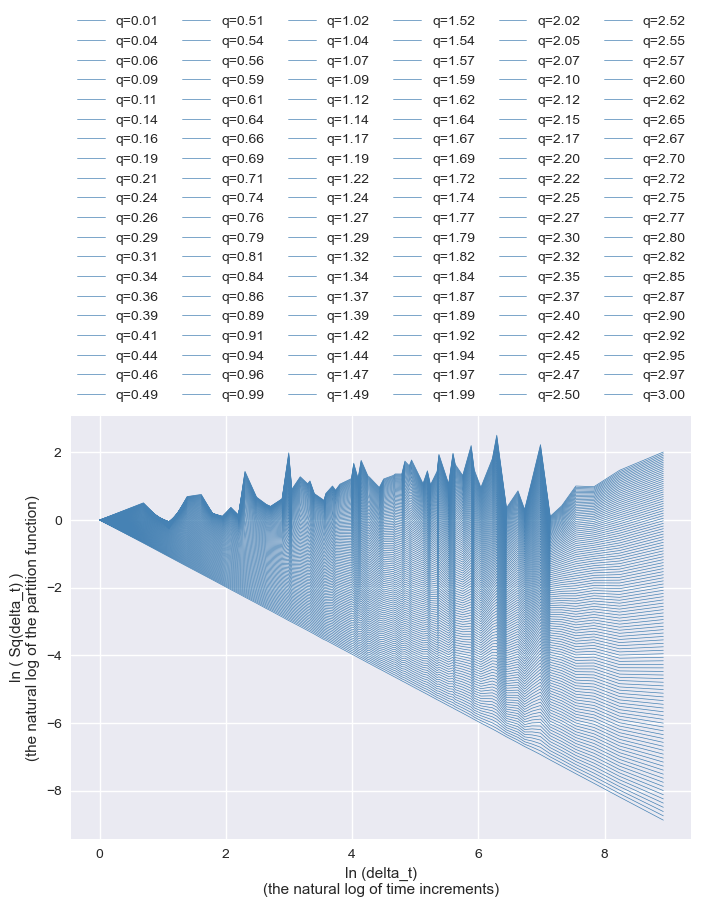

In [699]:
for i in range (0, len(q)):
    plt.plot(np.log(delta_t), np.log(list(partition.iloc[i])/partition[1][q[i]]), color="steelblue",linewidth=0.5, label=f'q={q[i]:.2f}')


plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=6, mode="expand", borderaxespad=0.)

plt.xlabel('ln (delta_t)\n(the natural log of time increments)')
plt.ylabel('ln ( Sq(delta_t) )\n(the natural log of the partition function)')

plt.show()

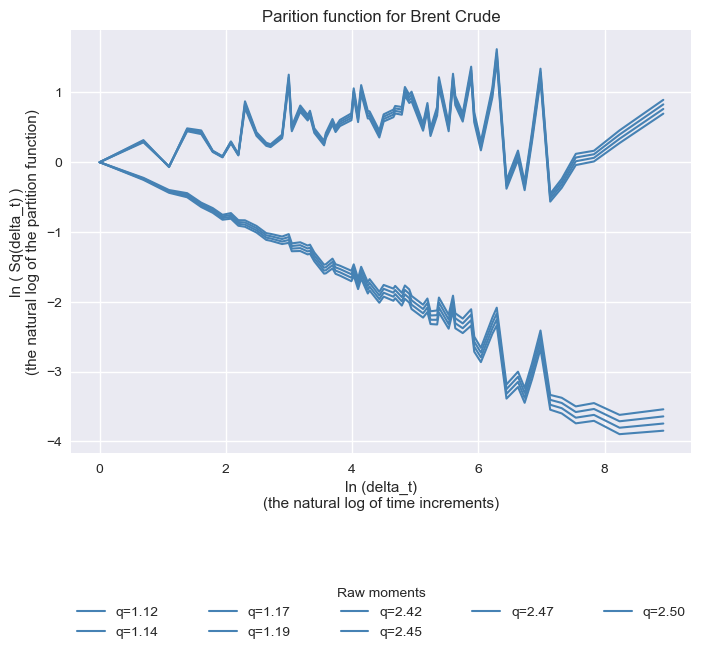

In [714]:
for i in range (0, len(q)):
    if  q[i]<2.5 and q[i]>2.42 or q[i]>1.1 and q[i]<1.2:
        plt.plot(np.log(delta_t), np.log(list(partition.iloc[i])/partition[1][q[i]]), color="steelblue", linewidth=1.5, label=f'q={q[i]:.2f}')


plt.legend(bbox_to_anchor=(0., -0.45, 1., .102), loc=3,
           ncol=5, mode="expand", borderaxespad=0., title="Raw moments")

plt.title("Parition function for Brent Crude")
plt.xlabel('ln (delta_t)\n(the natural log of time increments)')
plt.ylabel('ln ( Sq(delta_t) )\n(the natural log of the partition function)')

plt.show()

You can now proceed to estimating the scaling function - tau(q)

In [578]:
tau_regression=pd.DataFrame(np.log(delta_t))
tau_regression['LN_DELTA']=pd.DataFrame(np.log(delta_t))
tau_regression['LN_T']=[np.log(7560) for x in range(len(delta_t))]

def scaling_function(TAU_Q, PARTITION, Q):
    TAU_Q=[0 for x in range(len(Q))]
    
    for i in range(0,len(Q)):
        TAU_Q[i]=((sm.OLS(endog=np.log(list(PARTITION.iloc[i]/PARTITION[1][Q[i]])), exog = tau_regression[['LN_DELTA','LN_T']], missing='drop')).fit()).params[0]
    
    TAU_Q=pd.DataFrame(TAU_Q)

    return TAU_Q

Estimate tau_q for Brent Crude oil price


In [579]:
tau_q=0
tau_q = scaling_function(tau_q, partition, q)
hypothetical_tau_q = [0.5*x -1 for x in q]

In [580]:
def estimate_H(TAU_Q, Q, MIN_Q, MAX_Q):
    TAU_Q_ESTIMATED = np.polyfit(Q[MIN_Q:MAX_Q], TAU_Q[MIN_Q:MAX_Q], 2)
    
    def f(x):
        return TAU_Q_ESTIMATED[0][0]*x**2 + TAU_Q_ESTIMATED[1][0]*x + TAU_Q_ESTIMATED[2][0]
    
    temp = fsolve(f, [0,4])
    
    H = 1/temp
    return H[0]

print("Here we have defined our function for precisely estimating H.")

max_q = 120
H = estimate_H(tau_q, q, 0, max_q)


print("Here, we calculate our H-value to be:\n")
print(" H = " + str(H))


Here we have defined our function for precisely estimating H.
Here, we calculate our H-value to be:

 H = 0.4148323458290346


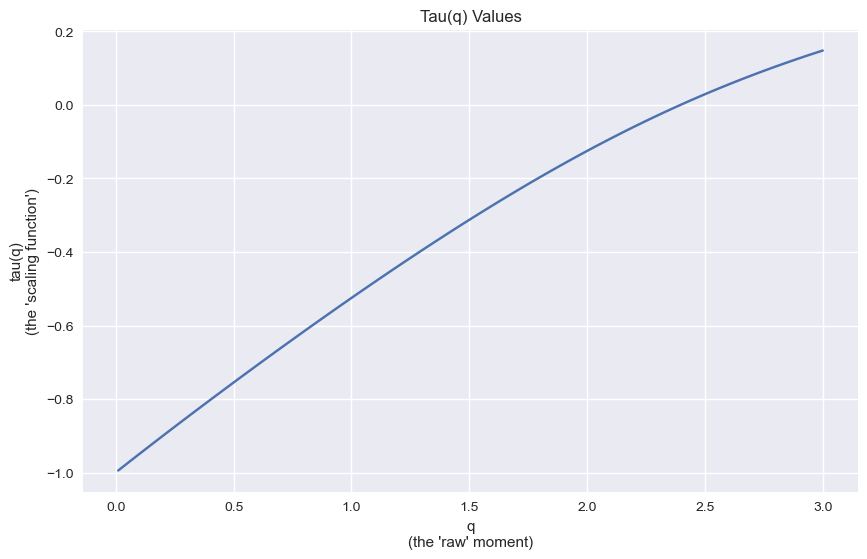

In [717]:
# plot τ(q) with q
# Monofractal signals show a linear τ(q) curve. The slope gives the single Hurst exponent H.
# Multifractal τ(q) curves are nonlinear. The curvature reveals richer structure.
# If the graph is not showing quadratic shape, the power used to produce q values may need to refine
plt.figure(figsize=(10, 6))
y = np.array(partition.index)
plt.plot(y, tau_q)
plt.title('Tau(q) Values')
plt.xlabel("q\n(the 'raw' moment)")
plt.ylabel("tau(q)\n(the 'scaling function')")
# plt.savefig('tau_values.png')
plt.show()

In [582]:
def calculate_scaling_exponent(delta, x_t, q):
    '''
    @param: delta array: time interval range
    @param: x_t array: the time series
    @param: q float: the power q
    
    @return: Fq pd.DataFrame: the partition function values for different delta and q
    @return: tau_q_list list: the scaling exponent
    '''
    # Initialize a 2D array sigma to store the partition function values.
    # row for different delta
    Fq = [[0 for x in range(len(delta))] for y in range(len(q))]
    
    # Loop through each exponent q[k] and time lag delta[j].
    # For each q and delta, compute the partition function by:
    # i) Iterating through the time series in chunks of size delta[j]
    # ii) Calculating the absolute difference between each point and the point delta[j] steps ahead
    # iii) Summing the q[k] power of these differences
    for k in range (0, len(q)):
        if k%30==0: # dividable by 30
            print("calculating q=" + str(k) + ' out of ' + str(len(q)-1))
            
        for j in range (0,len(delta)):
            
            for i in range (0,len(x_t)-1):
                if i < int((len(x_t)-1)/delta[j]):
                    Fq[k][j]=Fq[k][j] + abs(x_t[i*delta[j]+delta[j]]-x_t[i*delta[j]])**q[k]

    Fq=pd.DataFrame(Fq)

    for i in range(0,len(q)):
        Fq.rename(index={Fq.index[i]:q[i]}, inplace=True)
    for i in range(len(delta)-1,-1,-1):
        Fq.rename(columns={Fq.columns[i]:delta[i]}, inplace=True)

    print("Finished calculating the partition values Fq")

    # Power-law regression on log Fq(q, delta) vs log delta to get scaling exponent τ(q)
    # If the signal has scaling properties, Fq will follow a power law:
    # Fq ~ delta^τ(q)
    tau_q_list = []
    for i,row in Fq.iterrows():
        Fq_matrix = np.vstack([np.log10(row.values), np.ones(len(row))]).T
        tau_q, c = np.linalg.lstsq(Fq_matrix, np.log10(delta), rcond=-1)[0]
        tau_q_list.append(tau_q)

    return Fq, tau_q_list

In [583]:
print("We have seen that the partition function Sq(T,delta_t) for higher moments is less robust.\nSo in estimating our scaling function, we will restrict ourselves to lower moments.")
#print("\nHere, we will only use moments up to q=" + str(q[max_q]) + " to estimate the scaling function tau(q) by non-linear regression.")
print("\nNext, using the parameters that we obtained from regression, we will perform\na Legendre transformation on tau(q) to estimate the multifractal spectrum f(a).")


def estimate_multifractal_spectrum(TAU_Q, Q, MIN_Q, MAX_Q):
    TAU_Q_ESTIMATED = np.polyfit(Q[MIN_Q:MAX_Q], TAU_Q[MIN_Q:MAX_Q], 2)
    
    F_A = [0 for x in range(len(q)-10)]
    p = [0 for x in range(len(q)-10)]
    
    a = TAU_Q_ESTIMATED[0][0]
    b = TAU_Q_ESTIMATED[1][0]
    c = TAU_Q_ESTIMATED[2][0]
    
    for i in range(0, len(q)-10):
        p[i] = 2*a*Q[i]+b
        F_A[i] = ((p[i]-b)/(2*a))*p[i] - (a*((p[i]-b)/(2*a))**2 + b*((p[i]-b)/(2*a)) + c)
    
    F_A = pd.DataFrame(F_A)
    F_A.rename(columns={F_A.columns[0]:"f(a)"}, inplace=True)
    F_A['p'] = p
    
    print("Using the range of q's from " + str(Q[MIN_Q]) + " to " + str(Q[MAX_Q]) + ":")
    print("The estimated parameters for tau(q) are: \n" + str(TAU_Q_ESTIMATED))
    print("\nThus, the estimated parameters for f(a) are: \n" + str(1/(4*a)) + ", \n"  + str((-2*b)/(4*a)) + ", \n"+ str((-4*a*c+b**2)/(4*a)))
    
    return F_A

We have seen that the partition function Sq(T,delta_t) for higher moments is less robust.
So in estimating our scaling function, we will restrict ourselves to lower moments.

Next, using the parameters that we obtained from regression, we will perform
a Legendre transformation on tau(q) to estimate the multifractal spectrum f(a).


In [584]:
f_a = estimate_multifractal_spectrum(tau_q, q, 0, 3)

print ("\nf_a Brent[f(a)][0] is: " + str(f_a['f(a)'][0]))

Using the range of q's from 0.01 to 0.0853781512605042:
The estimated parameters for tau(q) are: 
[[-0.04044621]
 [ 0.50605559]
 [-0.99928763]]

Thus, the estimated parameters for f(a) are: 
-6.181048382020155, 
6.255908215083823, 
-0.5836310407108865

f_a Brent[f(a)][0] is: 0.999283587064699


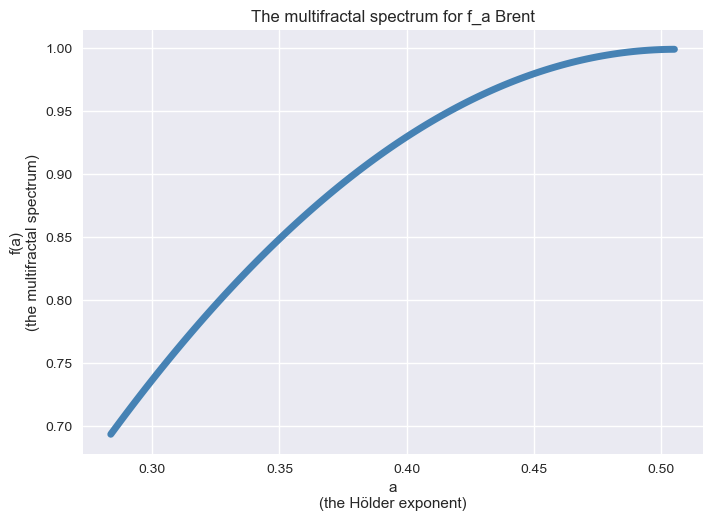

In [715]:
plt.title("The multifractal spectrum for f_a Brent")

plt.xlabel("a\n(the Hölder exponent)")
plt.ylabel('f(a)\n(the multifractal spectrum)')

# axes = plt.gca()
# axes.set_xlim([0.2,0.7])
# axes.set_ylim([0,1.1])

plt.plot(f_a['p'],f_a['f(a)'], color="steelblue",linewidth=5)

In [586]:
print("From this, it is easy to estimate the means and variances for the log-normal distribution:")
print("\nUsing: \n \n𝜆 = a / H \n \n and \n \n𝜎^2 = (2(𝜆-1))/ln[b]")

def lambda_mean(H,ALPHA):
    LAMBDA = ALPHA/H
    return LAMBDA

def sigma_variance(LAMBDA, B):
    SIGMA_VARIANCE = (2*(LAMBDA-1))/np.log(B)
    return SIGMA_VARIANCE

From this, it is easy to estimate the means and variances for the log-normal distribution:

Using: 
 
𝜆 = a / H 
 
 and 
 
𝜎^2 = (2(𝜆-1))/ln[b]


In [587]:
print("Assuming we will partition our multifractal cascade in two at each step, meaning b=2:")

b=2

lambda_Brent = lambda_mean(H, f_a['p'][0])


sigma_Brent = sigma_variance(lambda_Brent, b)

print("\nFor Brent, we estimate\n  𝜆 = " + str(lambda_Brent) + "\n  𝜎^2 = " + str(sigma_Brent))


Assuming we will partition our multifractal cascade in two at each step, meaning b=2:

For Brent, we estimate
  𝜆 = 1.2179538898994706
  𝜎^2 = 0.6288819922008508


In [588]:
# find the k when b == 2
days_for_simulation = 8192
K = math.ceil(np.log2(days_for_simulation)) # k value
display(K)
display(2**K)

13

8192

In [718]:
print("Here, we can print our final estimated results.\n")
print("We are now ready to begin constructing our MMAR simulations!\n")

RESULTS = pd.DataFrame([0 for x in range(0,1)])

RESULTS['H'] = pd.DataFrame([H])
RESULTS['alpha zero'] = pd.DataFrame([f_a['p'][0]])
RESULTS['lambda'] = pd.DataFrame([lambda_Brent])
RESULTS['sigma^2'] = pd.DataFrame([sigma_Brent])

RESULTS.rename(index={RESULTS.index[0]:'Brent'}, inplace=True)


RESULTS.drop(labels=0, axis=1, inplace=True)

RESULTS

RESULTS.round(decimals=3)

Here, we can print our final estimated results.

We are now ready to begin constructing our MMAR simulations!



,H,alpha zero,lambda,sigma^2
Brent,0.415,0.505,1.218,0.629


In [590]:
def lognormal_cascade(k, v,ln_lambda, ln_theta):
    
    k = k - 1

    m0 = np.random.lognormal(ln_lambda,ln_theta)
    m1 = np.random.lognormal(ln_lambda,ln_theta)
    M = [m0, m1]
    
    if (k >= 0):
        d=[0 for x in range(0,2)]
        for i in range(0,2):
            d[i] = lognormal_cascade(k, (M[i]*v), ln_lambda, ln_theta)
        
        v = d

    return v

In [591]:
new_cascade = list(np.array(lognormal_cascade(k=K, v=1, ln_lambda = lambda_Brent, ln_theta = sigma_Brent)).flat)

In [592]:
def calculate_lognormal_cascade(layers:int, v:float, ln_lambda:float, ln_sigma:float):
    '''
    @param: layers: the layers of the branching of lognormal cascade
    @param: v: the value for branching at each step
    @param: ln_lambda: the mean of the log-normal distribution for drawing the random lognormal weight
    @param: ln_sigma: the standard derivation of the log-normal distribution for drawing the random lognormal weight
    
    @return: v array: the values of the resultant lognormal cascade
    '''
    layers = layers - 1
    
    m0 = np.random.lognormal(ln_lambda,ln_sigma)
    m1 = np.random.lognormal(ln_lambda,ln_sigma)
    m0 = m0/(m0+m1)
    m1 = m1/(m0+m1)
    
    M = [m0, m1]

    if (layers >= 0):
        d=[0 for x in range(0,2)]
        for i in range(0,2):
            d[i] = calculate_lognormal_cascade(layers, (M[i]*v), ln_lambda, ln_sigma)

        v = d

    return v

In [594]:
def calculate_trading_time(layers:int, lognormal_cascade:list):
    '''
    @param: layers: the layers of the branching of lognormal cascade
    @param: lognormal_cascade: list of the lognormal cascade value
    
    @return: trading_time: list of the trading time calculated which is delta_t
    '''
    trading_time = 2**layers*np.cumsum(lognormal_cascade)/sum(lognormal_cascade)
    return trading_time

In [595]:
trading_time = calculate_trading_time(layers=K, lognormal_cascade=new_cascade)
trading_time = trading_time[:8192] # Only get the subset for the simulation

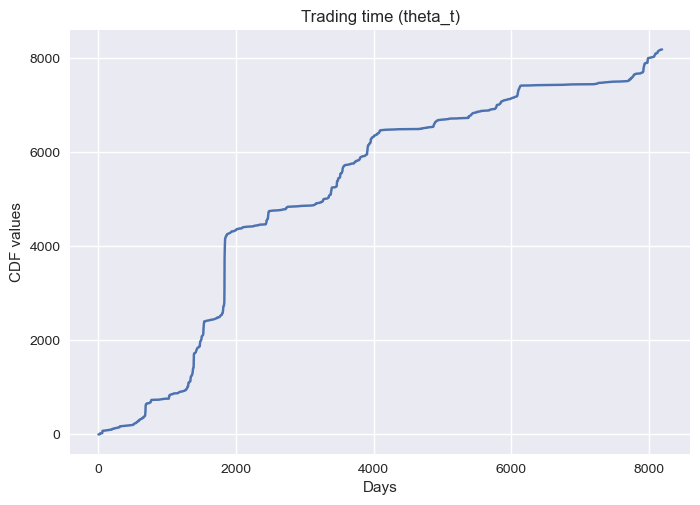

In [596]:
plt.plot(trading_time)
plt.title('Trading time (theta_t)')
plt.xlabel('Days')
plt.ylabel('CDF values')
plt.grid(True)
plt.show()

In [597]:
def calculate_magnitude_parameter(initial_value:float, eps:float, steps:float, number_of_path:int, real_std:float, layers:int, hurst_exponent:float):
    '''
    @param: initial_value: the initial value of the magnitude parameter
    @param: eps: the threshold of the difference in order for the magnitude parameter to be accepted
    @param: steps: the portion of the difference to be adjusted from the magnitude parameter
    @param: number_of_path: the number of paths for the simulation
    @param: real_std: the std of the underlying to be compared with
    @param: layers: the layers of the branching of lognormal cascade
    @param: hurst_exponent: the hurst exponent of the underlying
    
    @return: magnitude_parameter: the resultant magnitude parameter
    '''
    diff = np.inf
    magnitude_parameter = initial_value

    while abs(diff) > eps:
        std_list = []
        for nb in range(number_of_path): # excluding tqdm for a less verbose output
            new_fbm_class = FBM(n = 10*2**layers+1, hurst = hurst_exponent, length = magnitude_parameter, method='daviesharte')
            new_fbm_simulation = new_fbm_class.fbm()
            std_list.append(np.std(new_fbm_simulation))
        diff = real_std - np.median(std_list)
        print('Diff: ', diff)
        if abs(diff) > eps:
            magnitude_parameter += diff * steps
            print('new magnitude_parameter:', magnitude_parameter)

    return  magnitude_parameter

In [633]:
%%time
magnitude_parameter = calculate_magnitude_parameter(initial_value=0.5, eps=0.145, steps=0.5, number_of_path=100, real_std=np.std(data['Daily Return']), layers=K, hurst_exponent=H)

Diff:  -0.25932680015614684
new magnitude_parameter: 0.3703365999219266
Diff:  -0.2372441193796662
new magnitude_parameter: 0.2517145402320935
Diff:  -0.17481997105527072
new magnitude_parameter: 0.16430455470445815
Diff:  -0.16289780056694092
new magnitude_parameter: 0.08285565442098769
Diff:  -0.09854323140158575
CPU times: user 6min 7s, sys: 3.9 s, total: 6min 11s
Wall time: 6min 18s


In [634]:
def calculate_mmar_returns(S0:float, number_of_path:int, layers:int, hurst_exponent:float, trading_time:list, magnitude_parameter:float, time_window_base:float=10):
    '''
    @param: S0: the initial value of the underlying asset's price
    @param: number_of_path: the number of paths for the simulation
    @param: layers: the layers of the branching of lognormal cascade
    @param: hurst_exponent: the hurst exponent of the underlying
    @param: trading_time: the trading time
    @param: magnitude_parameter: the magnitude parameter to control the length of the FBM process
    @param: time_window_base: the base for defining the time window
    
    @return: mmar_returns: the simulated return of mmar
    @return: mmar_prices: the simulated prices of the underlying assets
    '''
    mmar_returns = []
    mmar_prices = []

    for nb in tqdm(range(number_of_path)):
        new_fbm_class = FBM(n = 10*2**layers+1, hurst = hurst_exponent, length = magnitude_parameter, method='daviesharte')
        new_fbm_simulation = new_fbm_class.fbm()
        new_fbm_simulation = new_fbm_simulation[1:]
        
        # --- MMAR returns's ---
        simulated_xt_array = [0 for x in range(0, len(trading_time))]
        for i in range(0, len(trading_time)):
            simulated_xt_array[i] = new_fbm_simulation[int(trading_time[i]*10)]
        mmar_returns.append(simulated_xt_array)
            
        # --- PRICES ---
        simulated_prices_array = S0 * np.exp(simulated_xt_array)
        mmar_prices.append(simulated_prices_array)

    return mmar_returns, mmar_prices

In [635]:
number_of_path = 1000
s0 = data['DCOILBRENTEU'].iloc[-1]  # Starting price

mmar_returns, prices_paths = calculate_mmar_returns(S0=s0, number_of_path=number_of_path, layers=K, hurst_exponent=H, trading_time=trading_time, magnitude_parameter=magnitude_parameter)

100%|██████████| 1000/1000 [13:22<00:00,  1.25it/s]


In [636]:
def plot_mmar_paths(paths, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    
    for path in paths:
        plt.plot(path)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

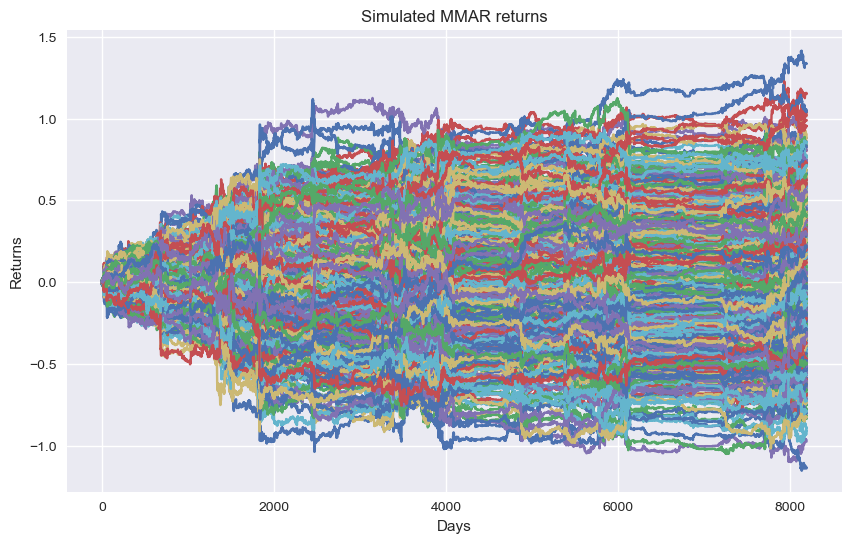

In [637]:
plot_mmar_paths(mmar_returns, 'Simulated MMAR returns', 'Days', 'Returns')

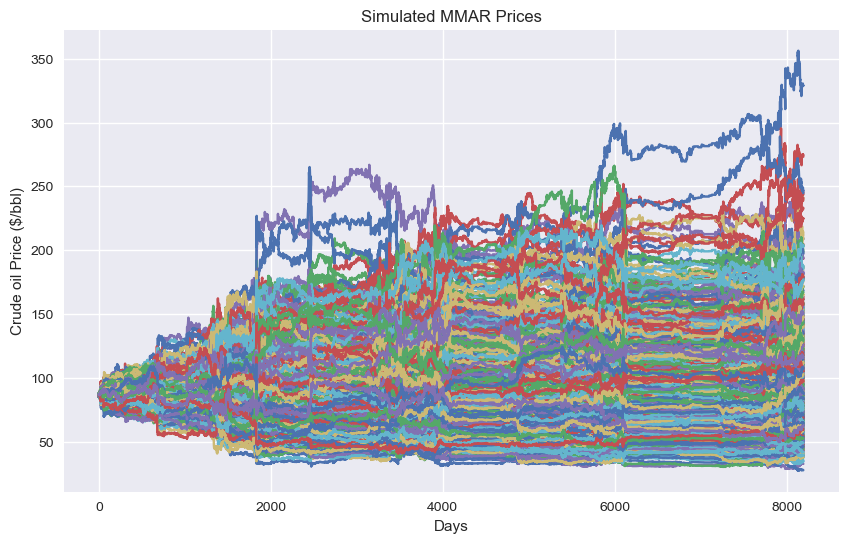

In [638]:
plot_mmar_paths(prices_paths, 'Simulated MMAR Prices', 'Days', 'Crude oil Price ($/bbl)')

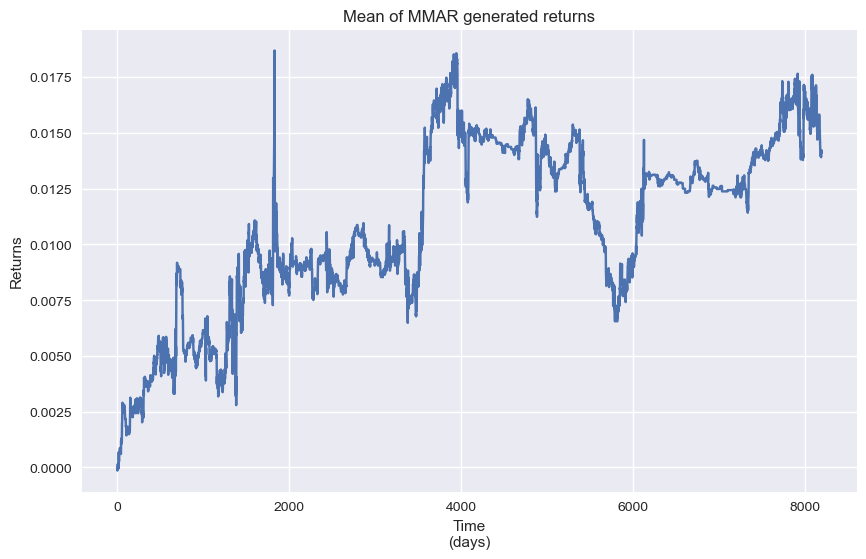

In [639]:
mean_return = np.mean(mmar_returns, axis=0)

plot_mmar_paths([mean_return], 'Mean of MMAR generated returns', 'Time\n(days)', 'Returns')

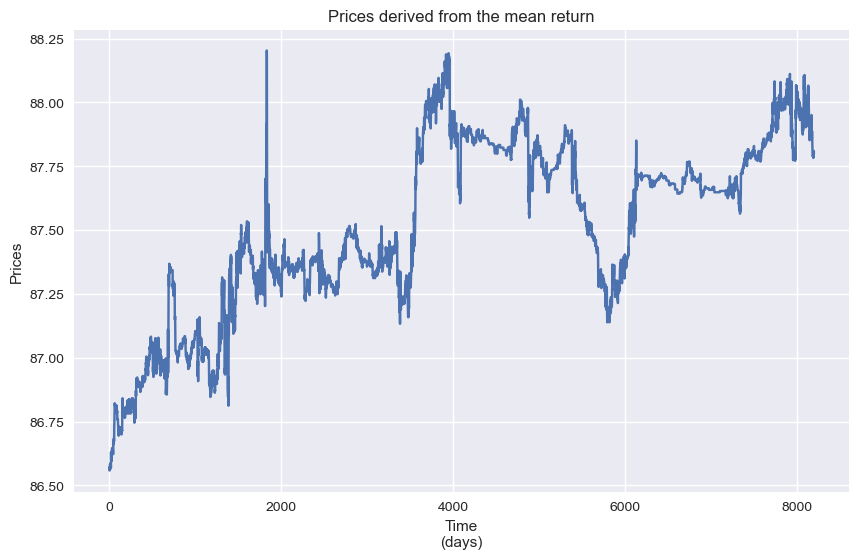

In [640]:
mean_prices = s0*np.exp(mean_return)

plot_mmar_paths([mean_prices], 'Prices derived from the mean return', 'Time\n(days)', 'Prices')

In [641]:
s0 = data['DCOILBRENTEU'].iloc[-1]  # Starting price
r = 0.05
T = 1
strike_p = s0  # Strike price

In [642]:
def price_option(paths, strike, r, T, option_type='call'):
    """
    Calculate the option price (european) given simulated paths.
    
    Parameters:
    - paths: An array of simulated asset paths. 
    - strike: Strike price of the option.
    - r: Risk-free rate.
    - T: Time to maturity in years.
    - option_type: call or put.
    
    Returns:
    - Option price
    """
    
    if isinstance(paths, list):
        paths = np.array(paths)
        
    # Get the asset prices at maturity (last column of paths matrix)
    S_T = paths[:, -1]
    
    # Calculate the payoff for each path
    if option_type == 'call':
        payoffs = np.maximum(S_T - strike, 0)
    elif option_type == 'put':
        payoffs = np.maximum(strike - S_T, 0)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    # Average the payoffs and discount back to today
    option_price = np.exp(-r * T) * np.mean(payoffs)
    
    return option_price

In [643]:
print("Call option price: ", price_option(prices_paths, strike_p, r, T, option_type='call'))
print("Put option price: ", price_option(prices_paths, strike_p, r, T, option_type='put'))

Call option price:  15.936512466742839
Put option price:  9.105901729604353


In [644]:
def price_options_for_strikes(paths, center=80, step=5, num_strikes=5, r=0.05, T=1):
    """
    """

    option_prices = {}

    # Calculate prices f or many strikes
    for i in range(1, num_strikes + 1):
        strike = center - i * step
        option_prices[strike] = price_option(paths, strike, r, T, option_type='put')

    # Calculate prices for strikes at and above the center
    for i in range(num_strikes + 1):
        strike = center + i * step
        option_prices[strike] = price_option(paths, strike, r, T, option_type='call')

    return option_prices

prices = price_options_for_strikes(prices_paths, center=80, step=5, num_strikes=10, r=r, T=T)
for strike, price in prices.items():
    print(f"Strike {strike}: Price {price:.3f}")

Strike 75: Price 4.604
Strike 70: Price 3.188
Strike 65: Price 2.050
Strike 60: Price 1.239
Strike 55: Price 0.725
Strike 50: Price 0.373
Strike 45: Price 0.139
Strike 40: Price 0.042
Strike 35: Price 0.010
Strike 30: Price 0.002
Strike 80: Price 19.417
Strike 85: Price 16.724
Strike 90: Price 14.299
Strike 95: Price 12.227
Strike 100: Price 10.441
Strike 105: Price 8.891
Strike 110: Price 7.552
Strike 115: Price 6.415
Strike 120: Price 5.476
Strike 125: Price 4.688
Strike 130: Price 4.009
